<a href="https://colab.research.google.com/github/Ehsan-Rezaei97/NN/blob/main/ANN(CLA)_Ehsan_REZAEI_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preperation 
first we test that if we using gpu to calculate 
I chose GPU over Cpu since gpu has lot of core and it's better for parallel calculations 

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


for faster reload data I decidecided to use my google drive for excel files

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


panda library is added since I gonna use data fram

numpy library is for doing maxrix calculations 

matplotlib to plot

keras to use ANN

sklearn to split test data and trains 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from google.colab import data_table

we add excel file with panda package 

In [ ]:
dataset = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/ANN - factory_process_CLA.xlsx')

# print whole sheet data

data_table.DataTable(dataset, include_index=False, num_rows_per_page=10 , max_columns=100) # just show data to debug 


# Data Cleaning

we remove unwanted columns 

we just need Conformity7

In [ ]:
for i in range(1, 13):
    if i == 7:
        pass
    else:
        dataset = dataset.drop('Conformity{}'.format(i), axis=1)
data_table.DataTable(dataset, include_index=False, num_rows_per_page=10 , max_columns=100)

to control afect of variables we need to normalize our data

\begin{equation}


Z\, = \,\frac{{x\, - \,\mu }}{\partial }% MathType!End!2!1!


\end{equation}

we dont need to normal target since it's binary


In [ ]:
deviation = np.std(dataset, axis=0) 
mean = dataset.mean(axis=0)
tem=dataset['Conformity7']
for i, dev_i in enumerate(deviation):
    if dev_i != 0:
        normdata = (dataset.iloc[:, i] - mean[i]) / dev_i
        dataset.iloc[:, i] = normdata
print(mean,"\n---------------------------------------------------------")
print(deviation)
dataset['Conformity7'] = tem # reinsert target

Humidity                                                16.918504
Temperature                                             23.860989
Machine1,RawMaterial,Property1                          11.540000
Machine1,RawMaterial,Property2                         200.000000
Machine1,RawMaterial,Property3                         963.000000
Machine1,RawMaterial,Property4                         247.000000
Machine1,RawMaterialFeederParameter,U,Actual          1243.863592
Machine1,Zone1Temperature,C,Actual                      72.095426
Machine1,Zone2Temperature,C,Actual                      72.016718
Machine1,MotorAmperage,U,Actual                         70.015386
Machine1,MotorRPM,C,Actual                              10.498634
Machine1,MaterialPressure,U,Actual                     422.590159
Machine1,MaterialTemperature,U,Actual                   80.428925
Machine1,ExitZoneTemperature,C,Actual                   75.031644
Machine2,RawMaterial,Property1                          12.610247
Machine2,R

In [ ]:
dataset

Humidity  ...  Conformity7
0    1.565886  ...            0
1    1.565886  ...            0
2    1.565886  ...            0
3    1.565886  ...            0
4    1.565886  ...            0
..        ...  ...          ...
804 -0.918135  ...            0
805 -0.918135  ...            0
806 -0.918135  ...            0
807 -0.918135  ...            0
808 -0.918135  ...            0

[809 rows x 42 columns]

there is a lot of parameters we need to find which has the strongest relation with target

we use corration 

In [ ]:

dimm = 9 # after som test we decied to continue with cor grathar than 0.2
most_correlated = dataset.corr(method ='pearson').abs()['Conformity7'].sort_values(ascending=False)

most_correlated = most_correlated[:dimm+1]
   
dataset = dataset.loc[:, most_correlated.index]
x = dataset.drop('Conformity7', axis=1) # we separate parameters from target
y = dataset['Conformity7']

print(most_correlated)# jost for debug







Conformity7                              1.000000
Humidity                                 0.316872
Machine3,MaterialTemperature,U,Actual    0.300342
Machine2,MotorAmperage,U,Actual          0.290156
Temperature                              0.272280
Machine3,MaterialPressure,U,Actual       0.221448
Machine2,RawMaterial,Property1           0.210327
Machine2,RawMaterial,Property2           0.210327
Machine2,RawMaterial,Property4           0.210327
Machine2,RawMaterial,Property3           0.210327
Name: Conformity7, dtype: float64


In [ ]:
data_table.DataTable(x, include_index=False, num_rows_per_page=10 , max_columns=100)

In [ ]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
804    0
805    0
806    0
807    0
808    0
Name: Conformity7, Length: 809, dtype: int64


in this step we seperate som data as test data since at the end we want to find out how accurate our Ann is? 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
x_train_NumberOfRows = x_train.shape[0]
x_train_NumberOfColumns = x_train.shape[1]
data_table.DataTable(x_train, include_index=False, num_rows_per_page=10 , max_columns=100)



In [ ]:
data_table.DataTable(x_test, include_index=False, num_rows_per_page=10 , max_columns=100)

In [ ]:
print(y_train)

638    0
660    0
260    0
43     0
385    0
      ..
400    0
797    1
671    0
81     0
262    0
Name: Conformity7, Length: 728, dtype: int64


In [ ]:
print(y_test)

311    0
194    0
601    0
233    0
415    0
78     0
501    0
429    0
633    0
760    0
707    0
325    0
488    0
454    0
674    0
297    0
456    0
452    0
326    0
533    0
684    0
82     0
292    0
249    0
276    0
316    0
265    0
342    0
76     0
651    0
689    0
535    0
550    0
382    0
517    0
703    0
34     0
286    0
631    0
322    0
751    0
131    0
85     0
155    0
61     0
663    0
371    0
667    0
492    0
323    0
92     0
33     0
571    0
197    0
120    0
378    0
152    0
38     0
350    0
803    0
391    0
479    0
590    0
238    0
531    0
171    0
184    0
395    0
136    0
370    0
223    0
442    0
299    0
552    0
195    0
243    0
545    0
500    0
51     0
439    0
134    0
Name: Conformity7, dtype: int64


# comparing Ann to others
first we creat Ann with just 1 hiden layer 

then we chang number of neurons from 10 to 80 in 10 by 10 step

then we find how many neurons is best for just 1 layer

Model: "sequential_172"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_645 (Dense)            (None, 9)                 90        
_________________________________________________________________
dense_646 (Dense)            (None, 10)                100       
_________________________________________________________________
dense_647 (Dense)            (None, 1)                 11        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 - 1s - loss: 0.1761 - acc: 0.9382 - val_loss: 0.1614 - val_acc: 0.9383
Epoch 2/50
23/23 - 0s - loss: 0.1338 - acc: 0.9519 - val_loss: 0.1239 - val_acc: 0.9383
Epoch 3/50
23/23 - 0s - loss: 0.1000 - acc: 0.9519 - val_loss: 0.1004 - val_acc: 0.9383
Epoch 4/50
23/23 - 0s - loss: 0.0791 - acc: 0.9519 - val_loss: 0.0864 - val_acc: 0.9383
Epoch 5/50
23/23 - 0s - loss: 0.

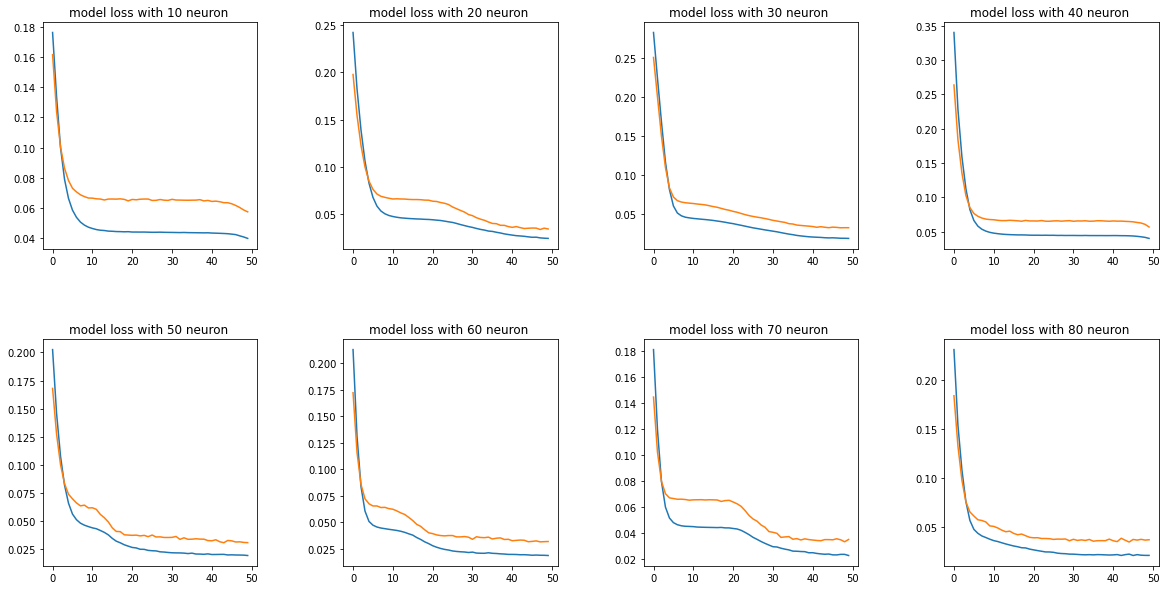

In [ ]:

minloos1 = 10 # we use it to find min of mse

plt.rcParams["figure.figsize"] = (20,10) #to plot more easily
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,9):
  model = Sequential()
  model.add(Dense(dimm, input_dim=dimm, activation='relu')) # for this kind of rule (Rectified Linear Unit) is very good
  model.add(Dense(i*10, activation='relu'))# for this kind of rule (Rectified Linear Unit) is very good
  model.add(Dense(1, activation='sigmoid')) # we have only 1 neuron and we use sigmoid since our target is 0 and 1
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])#Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
  model.summary()

  history = model.fit(x_train, y_train, epochs=50, verbose=2,shuffle=True, validation_data=(x_test, y_test))# after some tries we know epochs is enough 
  predictions = model.predict(x_test)

  print(history.history.keys())
  mean_test_error = model.evaluate(x_test,y_test) # to extract mse and acc
  ax = fig.add_subplot(2,4,i)
  plt.title('model loss with {} neuron '.format(i*10))
  ax.plot(history.history['loss'])
  ax.plot(history.history['val_loss'])
  if minloos1 > mean_test_error1[0] : # if we got better result than before then we change our answer to that
    model1= model
    minloos1 = mean_test_error[0] 
    accuracy1 = mean_test_error[1]*100
    conter1 = i
    lo1=history.history['loss']
    ac1=history.history['val_loss']
    vl1=history.history['acc']
    va1=history.history['val_acc']
print("\n-------------------")
print("MSE = ",minloos1," and nmber of neuron = ", conter1*10," with accuracy = ",accuracy1)#it gives us best number of neuron in 1 layer
print("\n-------------------")



In [ ]:

minloos1 = 10 # we use it to find min of mse

plt.rcParams["figure.figsize"] = (20,10) #to plot more easily
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,9):
  model = Sequential()
  model.add(Dense(dimm, input_dim=dimm, activation='tanh')) # for this kind of rule (Rectified Linear Unit) is very good
  model.add(Dense(i*10, activation='tanh'))# for this kind of rule (Rectified Linear Unit) is very good
  model.add(Dense(1, activation='sigmoid')) # we have only 1 neuron and we use sigmoid since our target is 0 and 1
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])#Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
  #since we want to min MSE we put it in loss function and since we need uaccuracy we use acc in metrics
  model.summary()

  history = model.fit(x_train, y_train, epochs=50, verbose=2,shuffle=True, validation_data=(x_test, y_test))# after some tries we know epochs is enough 
  predictions = model.predict(x_test)

  print(history.history.keys())
  mean_test_error = model.evaluate(x_test,y_test) # to extract mse and acc
  ax = fig.add_subplot(2,4,i)
  plt.title('model loss with {} neuron '.format(i*10))
  ax.plot(history.history['loss'])
  ax.plot(history.history['val_loss'])
  if minloos1 > mean_test_error1[0] : # if we got better result than before then we change our answer to that
    model1= model
    minloos1 = mean_test_error[0] 
    accuracy1 = mean_test_error[1]*100
    conter1 = i
    lo1=history.history['loss']
    ac1=history.history['val_loss']
    vl1=history.history['acc']
    va1=history.history['val_acc']
print("\n-------------------")
print("MSE = ",minloos1," and nmber of neuron = ", conter1*10," with accuracy = ",accuracy1)#it gives us best number of neuron in 1 layer
print("\n-------------------")



NameError: ignored

now we run code for 2 hiden layer

its same as the previous one except we add another layer

Model: "sequential_180"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_669 (Dense)            (None, 9)                 90        
_________________________________________________________________
dense_670 (Dense)            (None, 10)                100       
_________________________________________________________________
dense_671 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_672 (Dense)            (None, 1)                 11        
Total params: 311
Trainable params: 311
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 - 1s - loss: 0.3058 - acc: 0.1484 - val_loss: 0.2721 - val_acc: 0.3333
Epoch 2/50
23/23 - 0s - loss: 0.2443 - acc: 0.6497 - val_loss: 0.2221 - val_acc: 0.9136
Epoch 3/50
23/23 - 0s - loss: 0.1990 - acc: 0.9478 - val_loss: 0.1833 - val_

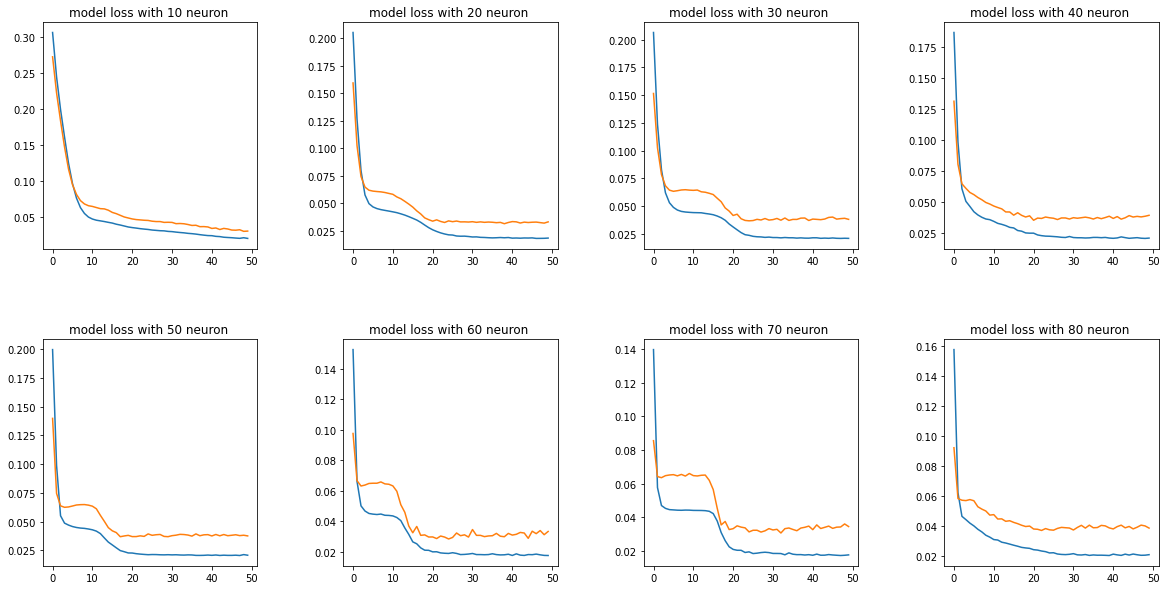

In [ ]:

minloos2 = 10

plt.rcParams["figure.figsize"] = (20,10)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,9):
  model = Sequential()
  model.add(Dense(dimm, input_dim=dimm, activation='relu'))
  model.add(Dense(i*10, activation='relu'))
  model.add(Dense(i*10, activation='relu'))#for middle layer rulu is better
  model.add(Dense(1, activation='sigmoid'))
  
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])
  model.summary()

  history = model.fit(x_train, y_train, epochs=50, verbose=2,shuffle=True, validation_data=(x_test, y_test))
  predictions = model.predict(x_test)

  print(history.history.keys())
  mean_test_error = model.evaluate(x_test,y_test)
  ax = fig.add_subplot(2,4,i)
  plt.title('model loss with {} neuron '.format(i*10))
  ax.plot(history.history['loss'])
  ax.plot(history.history['val_loss'])
  if minloos2 > mean_test_error[0] :
    model2= model
    minloos2 = mean_test_error[0] 
    accuracy2 = mean_test_error[1]*100
    conter2 = i
    lo2=history.history['loss']
    ac2=history.history['val_loss']
    vl2=history.history['acc']
    va2=history.history['val_acc']
print("\n-------------------")
print("MSE = ",minloos2," and nmber of neuron = ", conter2*10," with accuracy = ",accuracy2)
print("\n-------------------")


now we run code for 2 hiden layer

its same as the previous one except we add another layer

Model: "sequential_188"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_701 (Dense)            (None, 9)                 90        
_________________________________________________________________
dense_702 (Dense)            (None, 10)                100       
_________________________________________________________________
dense_703 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_704 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_705 (Dense)            (None, 1)                 11        
Total params: 421
Trainable params: 421
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
23/23 - 1s - loss: 0.2490 - acc: 0.6566 - val_loss: 0.2324 - val_acc: 0.9259
Epoch 2/50
23/23 - 0s - loss: 0.

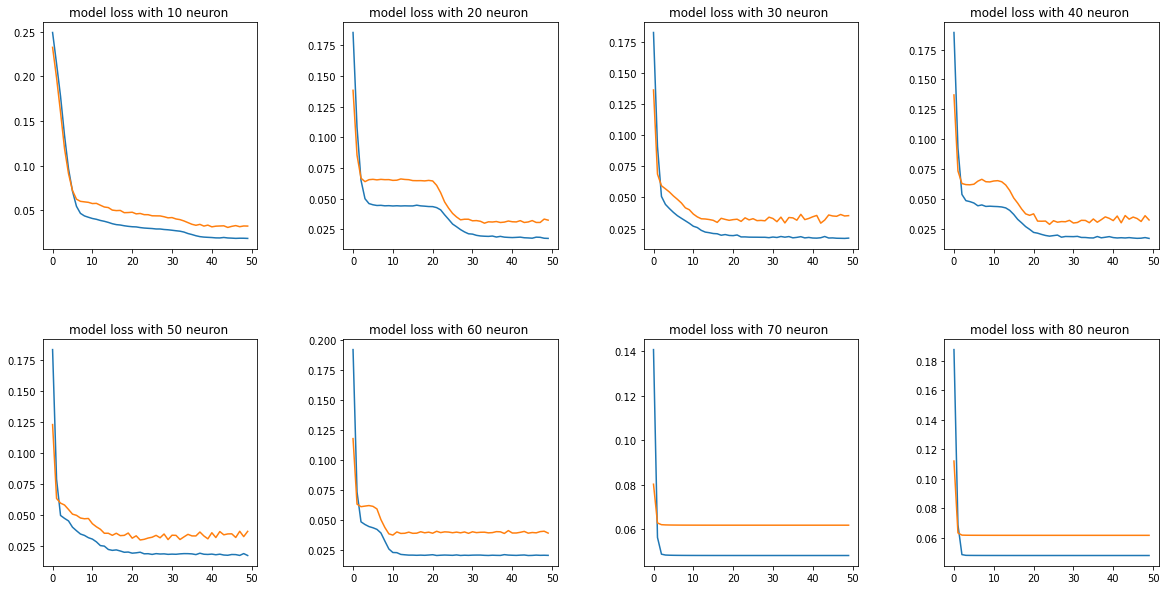

In [ ]:

minloos3 = 10

plt.rcParams["figure.figsize"] = (20,10)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,9):
  model = Sequential()
  model.add(Dense(dimm, input_dim=dimm, activation='relu'))
  model.add(Dense(i*10, activation='relu'))
  model.add(Dense(i*10, activation='relu'))
  model.add(Dense(i*10, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])
  model.summary()

  history = model.fit(x_train, y_train, epochs=50, verbose=2,shuffle=True, validation_data=(x_test, y_test))
  predictions = model.predict(x_test)

  print(history.history.keys())
  mean_test_error = model.evaluate(x_test,y_test)
  ax = fig.add_subplot(2,4,i)
  plt.title('model loss with {} neuron '.format(i*10))
  ax.plot(history.history['loss'])
  ax.plot(history.history['val_loss'])
  if minloos3 > mean_test_error[0] :
    model3= model
    minloos3 = mean_test_error[0] 
    accuracy3 = mean_test_error[1]*100
    conter3 = i
    lo3=history.history['loss']
    ac3=history.history['val_loss']
    vl3=history.history['acc']
    va3=history.history['val_acc']
print("\n-------------------")
print("MSE = ",minloos3," and nmber of neuron = ", conter3*10," with accuracy = ",accuracy3)
print("\n-------------------")

now we run code for 2 hiden layer

its same as the previous one except we add another layer

Model: "sequential_196"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_741 (Dense)            (None, 9)                 90        
_________________________________________________________________
dense_742 (Dense)            (None, 10)                100       
_________________________________________________________________
dense_743 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_744 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_745 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_746 (Dense)            (None, 1)                 11        
Total params: 531
Trainable params: 531
Non-trainable params: 0
______________________________________________________

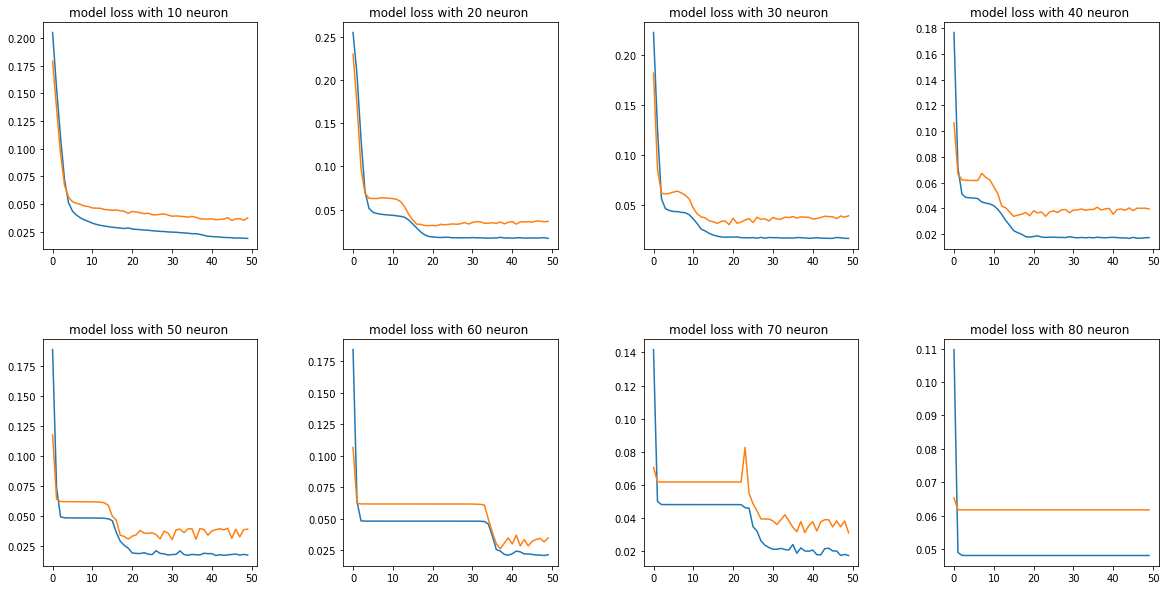

In [ ]:

minloos4 = 10

plt.rcParams["figure.figsize"] = (20,10)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,9):
  model = Sequential()
  model.add(Dense(dimm, input_dim=dimm, activation='relu'))
  model.add(Dense(i*10, activation='relu'))
  model.add(Dense(i*10, activation='relu'))
  model.add(Dense(i*10, activation='relu'))
  model.add(Dense(i*10, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])
  model.summary()

  history = model.fit(x_train, y_train, epochs=50, verbose=2,shuffle=True, validation_data=(x_test, y_test))
  predictions = model.predict(x_test)

  print(history.history.keys())
  mean_test_error = model.evaluate(x_test,y_test)
  ax = fig.add_subplot(2,4,i)
  plt.title('model loss with {} neuron '.format(i*10))
  ax.plot(history.history['loss'])
  ax.plot(history.history['val_loss'])
  if minloos4 > mean_test_error[0] :
    model4= model
    minloos4 = mean_test_error[0] 
    accuracy4 = mean_test_error[1]*100
    conter4 = i
    lo4=history.history['loss']
    ac4=history.history['val_loss']
    vl4=history.history['acc']
    va4=history.history['val_acc']
print("\n-------------------")
print("MSE = ",minloos4," and nmber of neuron = ", conter4*10," with accuracy = ",accuracy4)
print("\n-------------------")



now we run code for 2 hiden layer

its same as the previous one except we add another layer

Model: "sequential_204"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_789 (Dense)            (None, 9)                 90        
_________________________________________________________________
dense_790 (Dense)            (None, 10)                100       
_________________________________________________________________
dense_791 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_792 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_793 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_794 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_795 (Dense)            (None, 1)              

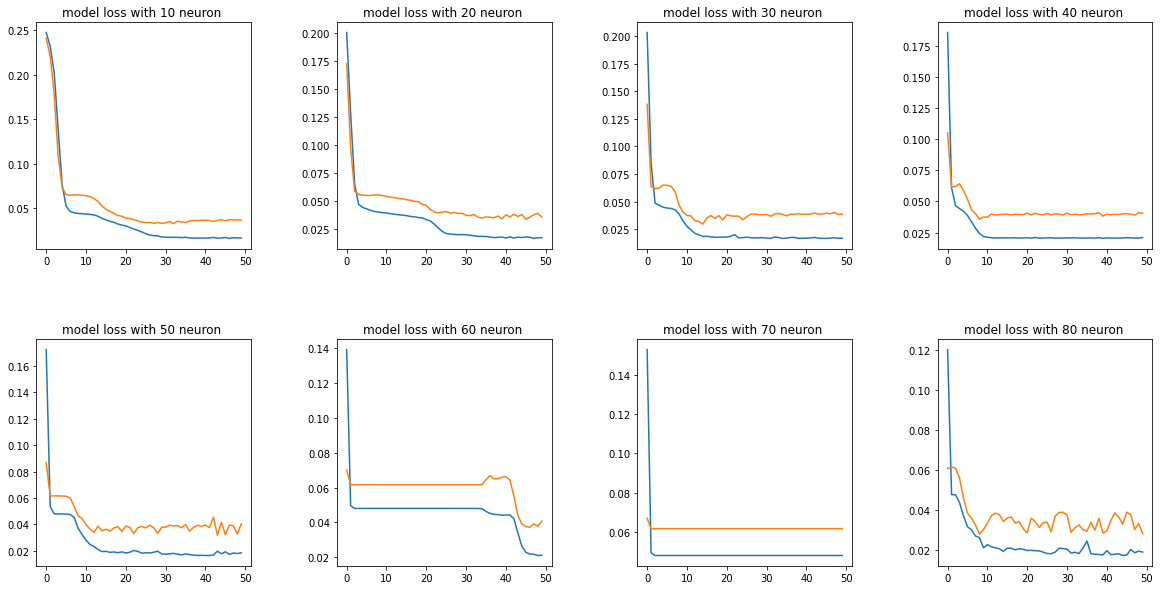

In [ ]:

minloos5 = 10

plt.rcParams["figure.figsize"] = (20,10)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,9):
  model = Sequential()
  model.add(Dense(dimm, input_dim=dimm, activation='relu'))
  model.add(Dense(i*10, activation='relu'))
  model.add(Dense(i*10, activation='relu'))
  model.add(Dense(i*10, activation='relu'))
  model.add(Dense(i*10, activation='relu'))
  model.add(Dense(i*10, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])
  model.summary()

  history = model.fit(x_train, y_train, epochs=50, verbose=2,shuffle=True, validation_data=(x_test, y_test))
  predictions = model.predict(x_test)

  print(history.history.keys())
  mean_test_error = model.evaluate(x_test,y_test)
  ax = fig.add_subplot(2,4,i)
  plt.title('model loss with {} neuron '.format(i*10))
  ax.plot(history.history['loss'])
  ax.plot(history.history['val_loss'])
  if minloos5 > mean_test_error[0] :
    model5= model
    minloos5 = mean_test_error[0] 
    accuracy5 = mean_test_error[1]*100
    conter5 = i
    lo5=history.history['loss']
    ac5=history.history['val_loss']
    vl5=history.history['acc']
    va5=history.history['val_acc']
print("\n-------------------")
print("MSE = ",minloos5," and nmber of neuron = ", conter5*10," with accuracy = ",accuracy5)
print("\n-------------------")



# Comparing
now we compare best of layers with each others

In [ ]:
print("\n MSE = ",minloos1," and nmber of neuron = ", conter1*10," with accuracy = ",accuracy1 , " with 1 hiden layer")
print("\n MSE = ",minloos2," and nmber of neuron = ", conter2*10," with accuracy = ",accuracy2, " with 2 hiden layer")
print("\n MSE = ",minloos3," and nmber of neuron = ", conter3*10," with accuracy = ",accuracy3, " with 3 hiden layer")
print("\n MSE = ",minloos4," and nmber of neuron = ", conter4*10," with accuracy = ",accuracy4, " with 4 hiden layer")
print("\n MSE = ",minloos5," and nmber of neuron = ", conter5*10," with accuracy = ",accuracy5, " with 5 hiden layer")


 MSE =  0.033755943179130554  and nmber of neuron =  20  with accuracy =  97.53086566925049  with 1 hiden layer

 MSE =  0.030301140621304512  and nmber of neuron =  10  with accuracy =  96.29629850387573  with 2 hiden layer

 MSE =  0.03223947063088417  and nmber of neuron =  10  with accuracy =  96.29629850387573  with 3 hiden layer

 MSE =  0.031046370044350624  and nmber of neuron =  70  with accuracy =  96.29629850387573  with 4 hiden layer

 MSE =  0.02809341438114643  and nmber of neuron =  80  with accuracy =  97.53086566925049  with 5 hiden layer


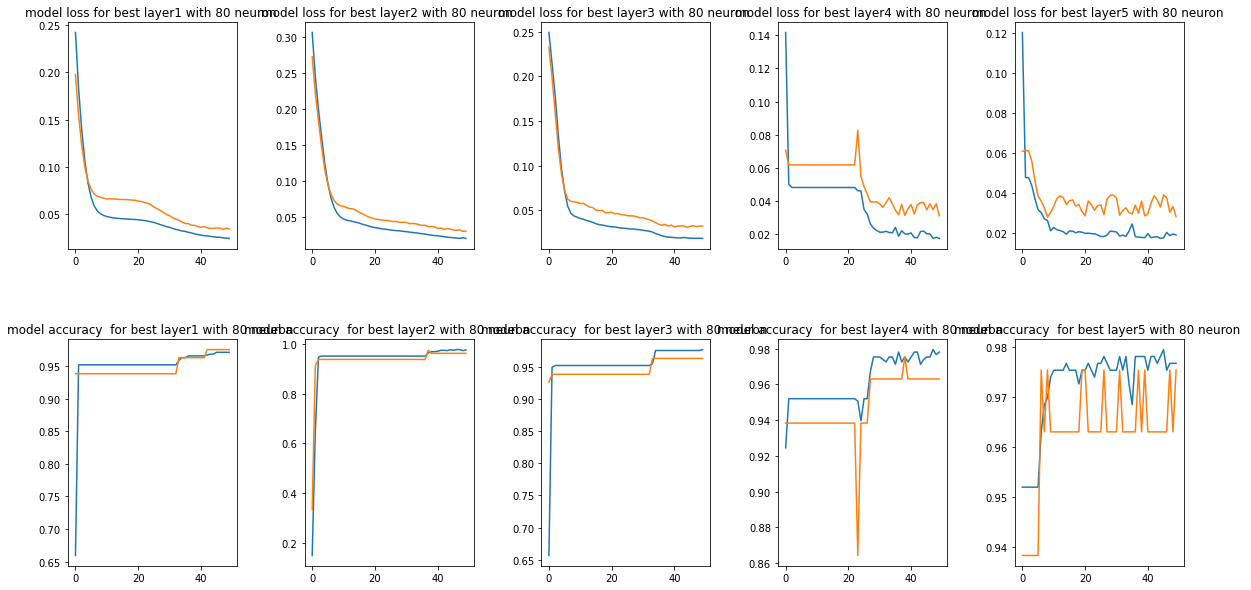

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)


ax = fig.add_subplot(2,5,1)
plt.title('model loss for best layer1 with {} neuron '.format(i*10))
ax.plot(lo1)
ax.plot(ac1)
ax = fig.add_subplot(2,5,6)
plt.title('model accuracy  for best layer1 with {} neuron '.format(i*10))
ax.plot(vl1)
ax.plot(va1)

ax = fig.add_subplot(2,5,2)
plt.title('model loss for best layer2 with {} neuron '.format(i*10))
ax.plot(lo2)
ax.plot(ac2)
ax = fig.add_subplot(2,5,7)
plt.title('model accuracy  for best layer2 with {} neuron '.format(i*10))
ax.plot(vl2)
ax.plot(va2)

ax = fig.add_subplot(2,5,3)
plt.title('model loss for best layer3 with {} neuron '.format(i*10))
ax.plot(lo3)
ax.plot(ac3)
ax = fig.add_subplot(2,5,8)
plt.title('model accuracy  for best layer3 with {} neuron '.format(i*10))
ax.plot(vl3)
ax.plot(va3)

ax = fig.add_subplot(2,5,4)
plt.title('model loss for best layer4 with {} neuron '.format(i*10))
ax.plot(lo4)
ax.plot(ac4)
ax = fig.add_subplot(2,5,9)
plt.title('model accuracy  for best layer4 with {} neuron '.format(i*10))
ax.plot(vl4)
ax.plot(va4)

ax = fig.add_subplot(2,5,5)
plt.title('model loss for best layer5 with {} neuron '.format(i*10))
ax.plot(lo5)
ax.plot(ac5)
ax = fig.add_subplot(2,5,10)
plt.title('model accuracy  for best layer5 with {} neuron '.format(i*10))
ax.plot(vl5)
ax.plot(va5)



to get best result we need to have 2 hiden layer with 10 neurons 